# Exercise 2

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data1 = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')
data1.head(52)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",NaN,Los microservicios son servicios web con alcan...,NaN
6,M,NaN,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",NaN
7,M,El análisis de series de tiempo (TSA) tiene un...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,NaN
8,F,Ejemplo 1: número de estudiantes semestrales i...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,NaN,Los microservicios es un tipo de arquitectura ...,NaN
9,M,"Pronósticos de producción, análisis de inflaci...",Una serie de tiempo contiene observaciones de ...,Arboles de decisión \nLos árboles de decisión ...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,NaN


In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Importar librerías para procesamiento de texto
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

# Importar librerías para modelado
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE  # Para resampleo de clases desbalanceadas

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Listamos todas las columnas que contienen las respuestas
response_columns = [col for col in data1.columns if col.startswith('E')]

# Combinar las respuestas en una sola columna
data1['Combined_Responses'] = data1[response_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [4]:
# Definir la función de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = str(text).lower()
    # Tokenizar
    tokens = word_tokenize(text, language='spanish')
    # Eliminar stopwords y signos de puntuación
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('spanish')]
    return tokens

# Aplicar el preprocesamiento
data1['tokens'] = data1['Combined_Responses'].apply(preprocess_text)


# Exercise 2.1

Analyze the writing patterns of each student

In [5]:
# Identificar columnas que contienen las respuestas
response_columns = [col for col in data1.columns if col.startswith('E')]

# Verificar las columnas de respuestas
print("Columnas de respuestas:", response_columns)


Columnas de respuestas: ['E1 - Examples of Time Series Analysis', 'E4 - Panel Data', 'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API', 'E11 - Natural Language Processing Overview']


In [6]:
# Combinar las respuestas de cada estudiante en una sola columna
data1['Combined_Responses'] = data1[response_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [7]:
# Definir función de preprocesamiento
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizar
    tokens = word_tokenize(text, language='spanish')
    # Eliminar stopwords
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    # Eliminar números y tokens vacíos
    tokens = [word for word in tokens if word.isalpha()]
    return tokens

# Aplicar preprocesamiento
data1['tokens'] = data1['Combined_Responses'].apply(preprocess_text)


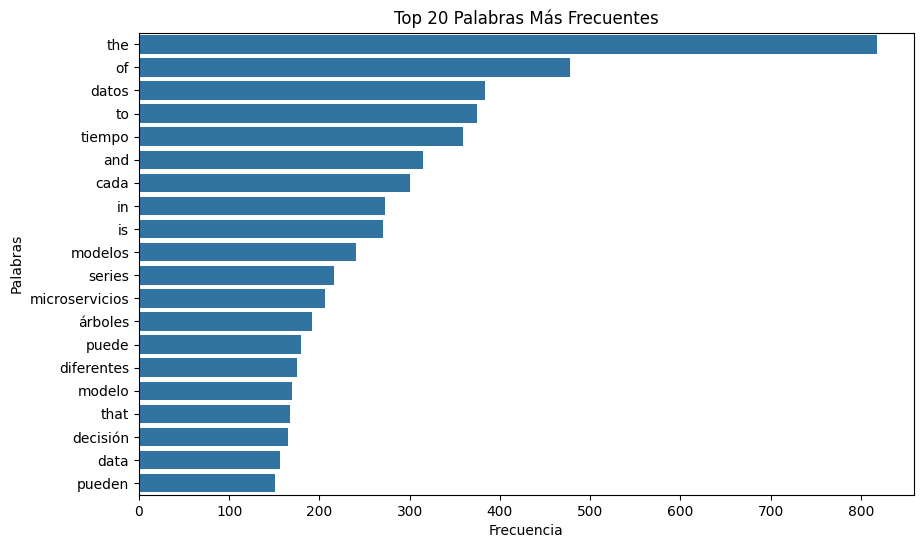

In [8]:
# Combinar todos los tokens en una sola lista
all_words = []
all_words.extend(data1['tokens'].explode())

# Contar las palabras más frecuentes
contador = Counter(all_words)
palabras_comunes = contador.most_common(20)

# Visualizar las palabras más comunes
palabras, frecuencias = zip(*palabras_comunes)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(frecuencias), y=list(palabras))
plt.title('Top 20 Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()


In [9]:
def avg_word_length(tokens):
    lengths = [len(word) for word in tokens]
    return np.mean(lengths) if lengths else 0

data1['avg_word_length'] = data1['tokens'].apply(avg_word_length)


In [10]:
def avg_sentence_length(text):
    sentences = nltk.sent_tokenize(text, language='spanish')
    lengths = [len(word_tokenize(sentence, language='spanish')) for sentence in sentences]
    return np.mean(lengths) if lengths else 0

data1['avg_sentence_length'] = data1['Combined_Responses'].apply(avg_sentence_length)


In [11]:
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens) if tokens else 0

data1['lexical_diversity'] = data1['tokens'].apply(lexical_diversity)


In [12]:
# Resetear el índice y asignarlo a una columna llamada 'ID'
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'ID'}, inplace=True)

In [13]:
# Mostrar las métricas de cada estudiante
metrics = data1[['ID', 'avg_word_length', 'avg_sentence_length', 'lexical_diversity']]
print(metrics)


    ID  avg_word_length  avg_sentence_length  lexical_diversity
0    0         5.587374            24.150000           0.442818
1    1         8.102389            38.693878           0.637088
2    2         6.623932            33.347826           0.549145
3    3         5.193810            28.196429           0.322771
4    4         5.426221            30.594937           0.382005
5    5         6.500688            32.368421           0.612105
6    6         7.386243            27.600000           0.546296
7    7         7.534170            22.472222           0.571827
8    8         7.894915            26.478261           0.762712
9    9         7.566197            32.318182           0.757746
10  10         7.694754            33.421053           0.664547
11  11         8.016497            30.545455           0.661168
12  12         7.952141            67.500000           0.595718
13  13         7.230769            35.153846           0.746606
14  14         7.700605            30.35

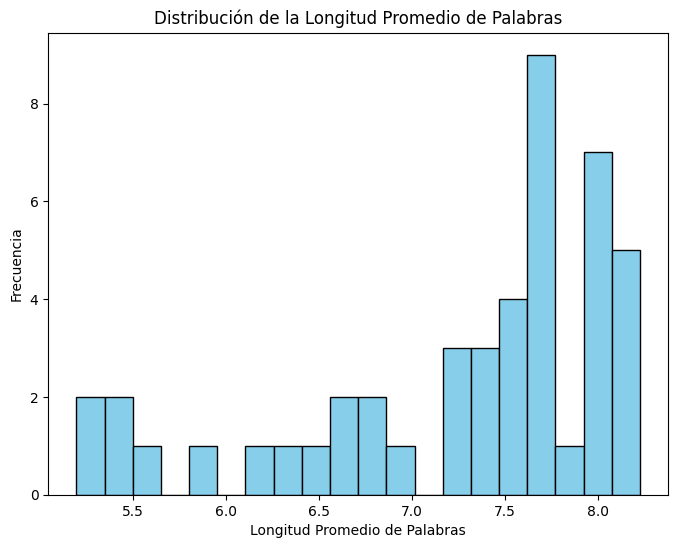

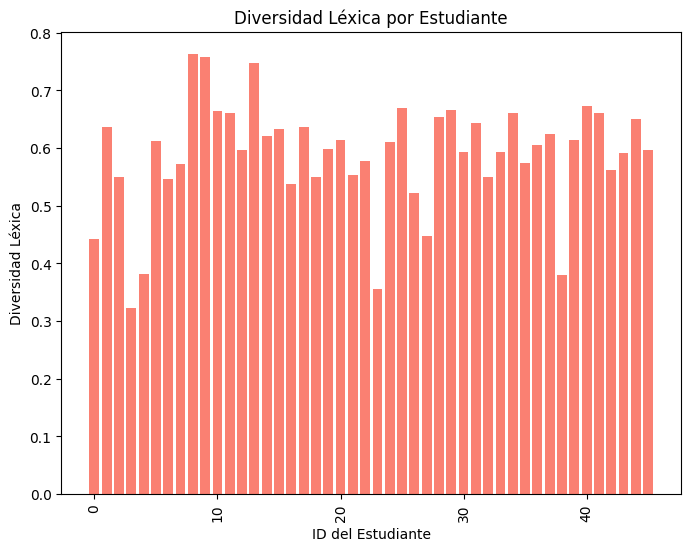

In [14]:
# Histograma de la longitud promedio de palabras
plt.figure(figsize=(8,6))
plt.hist(data1['avg_word_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Longitud Promedio de Palabras')
plt.xlabel('Longitud Promedio de Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de la diversidad léxica
plt.figure(figsize=(8,6))
plt.bar(data1['ID'], data1['lexical_diversity'], color='salmon')
plt.title('Diversidad Léxica por Estudiante')
plt.xlabel('ID del Estudiante')
plt.ylabel('Diversidad Léxica')
plt.xticks(rotation=90)
plt.show()


# Exercise 2.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


In [15]:
# Convertir tokens a texto plano
data1['clean_text'] = data1['tokens'].apply(lambda tokens: ' '.join(tokens))

# Vectorizar las respuestas combinadas de los estudiantes
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data1['clean_text'])


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similitud
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Crear un DataFrame de la matriz de similitud
similarity_df = pd.DataFrame(cosine_sim_matrix, index=data1['ID'], columns=data1['ID'])


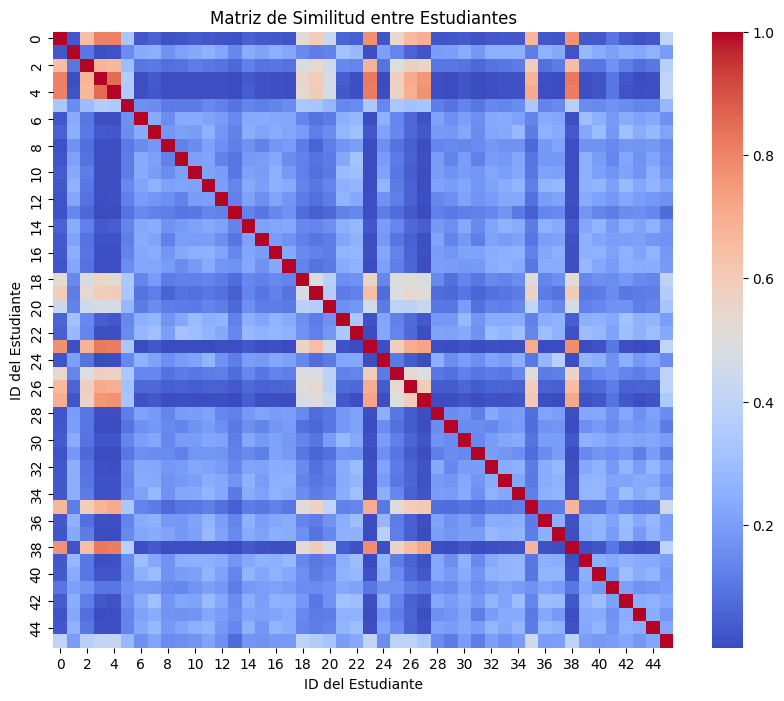

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(similarity_df, cmap='coolwarm')
plt.title('Matriz de Similitud entre Estudiantes')
plt.xlabel('ID del Estudiante')
plt.ylabel('ID del Estudiante')
plt.show()


In [18]:
# Umbral de similitud
threshold = 0.70

# Encontrar pares con similitud por encima del umbral
similar_pairs = []

for i in range(len(data1)):
    for j in range(i+1, len(data1)):
        sim_score = cosine_sim_matrix[i, j]
        if sim_score > threshold:
            similar_pairs.append((data1['ID'][i], data1['ID'][j], sim_score))

# Mostrar los pares similares
print("Pares de estudiantes con alta similitud en sus tareas:")
for pair in similar_pairs:
    print(f"Estudiante {pair[0]} y Estudiante {pair[1]} - Similitud: {pair[2]:.2f}")


Pares de estudiantes con alta similitud en sus tareas:
Estudiante 0 y Estudiante 3 - Similitud: 0.81
Estudiante 0 y Estudiante 4 - Similitud: 0.81
Estudiante 0 y Estudiante 23 - Similitud: 0.77
Estudiante 0 y Estudiante 38 - Similitud: 0.77
Estudiante 3 y Estudiante 4 - Similitud: 0.85
Estudiante 3 y Estudiante 23 - Similitud: 0.82
Estudiante 3 y Estudiante 26 - Similitud: 0.71
Estudiante 3 y Estudiante 27 - Similitud: 0.75
Estudiante 3 y Estudiante 38 - Similitud: 0.83
Estudiante 4 y Estudiante 23 - Similitud: 0.82
Estudiante 4 y Estudiante 27 - Similitud: 0.77
Estudiante 4 y Estudiante 35 - Similitud: 0.70
Estudiante 4 y Estudiante 38 - Similitud: 0.81
Estudiante 23 y Estudiante 27 - Similitud: 0.72
Estudiante 23 y Estudiante 35 - Similitud: 0.70
Estudiante 23 y Estudiante 38 - Similitud: 0.78
Estudiante 27 y Estudiante 38 - Similitud: 0.71


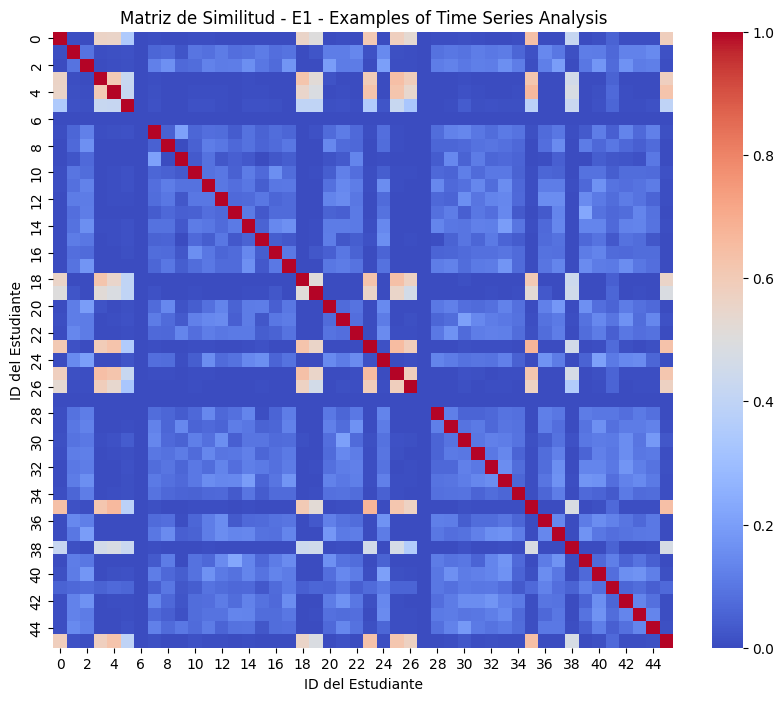

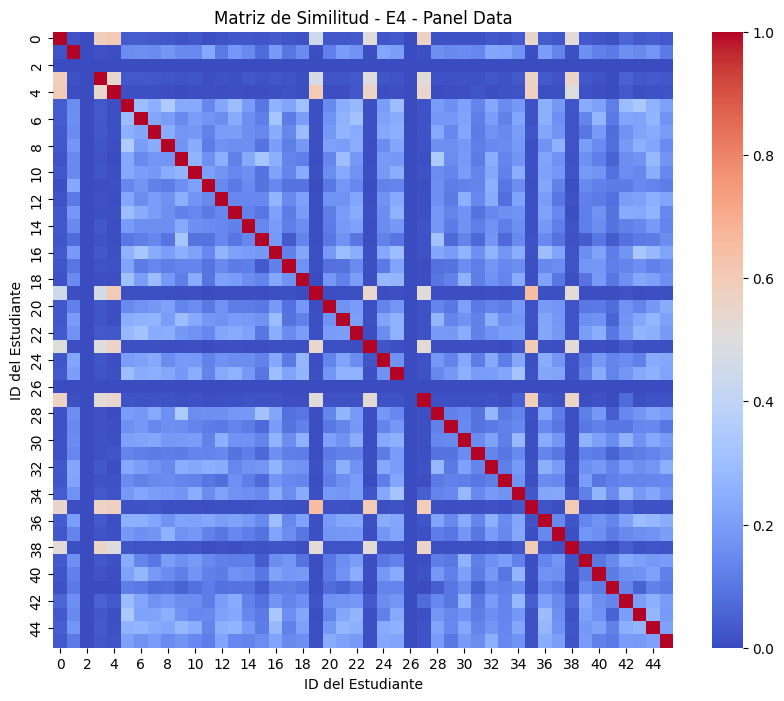

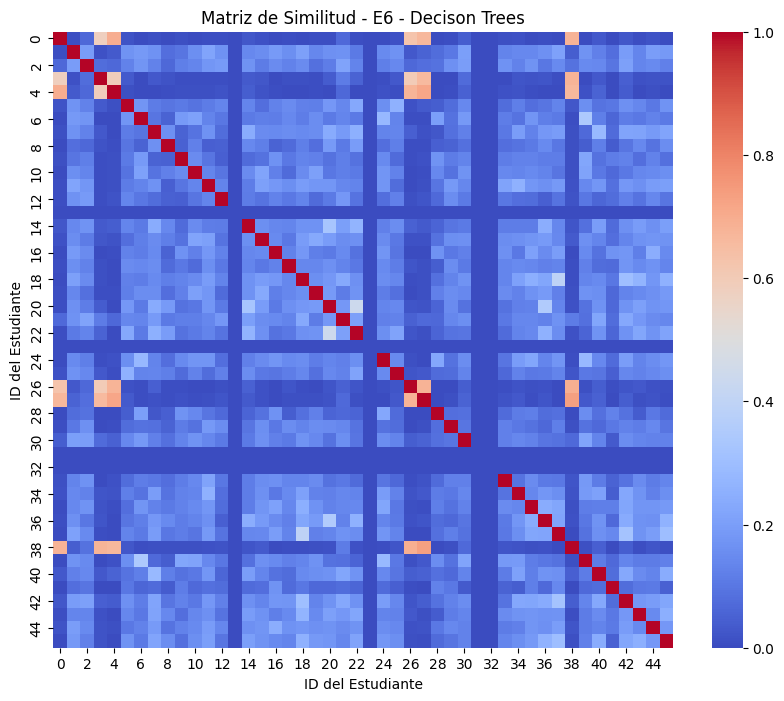

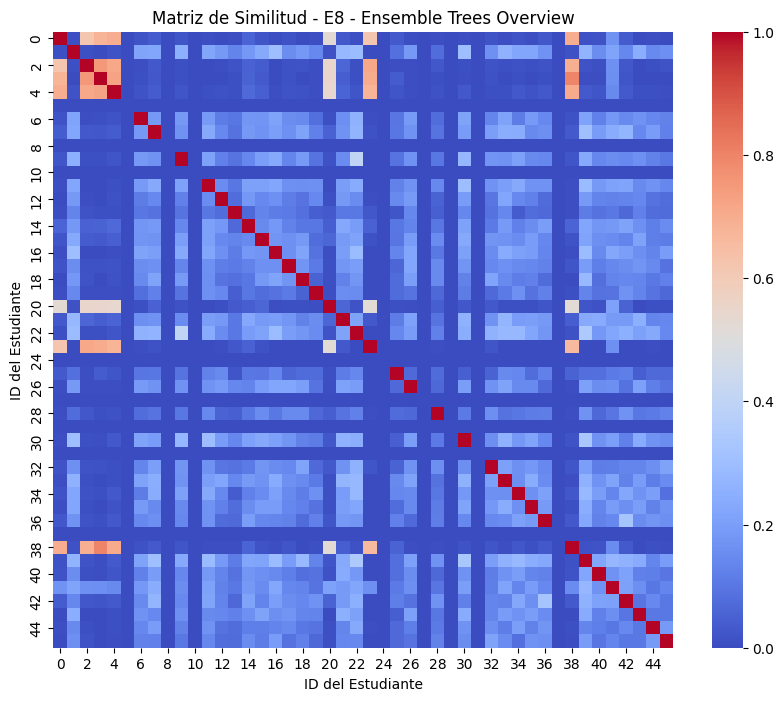

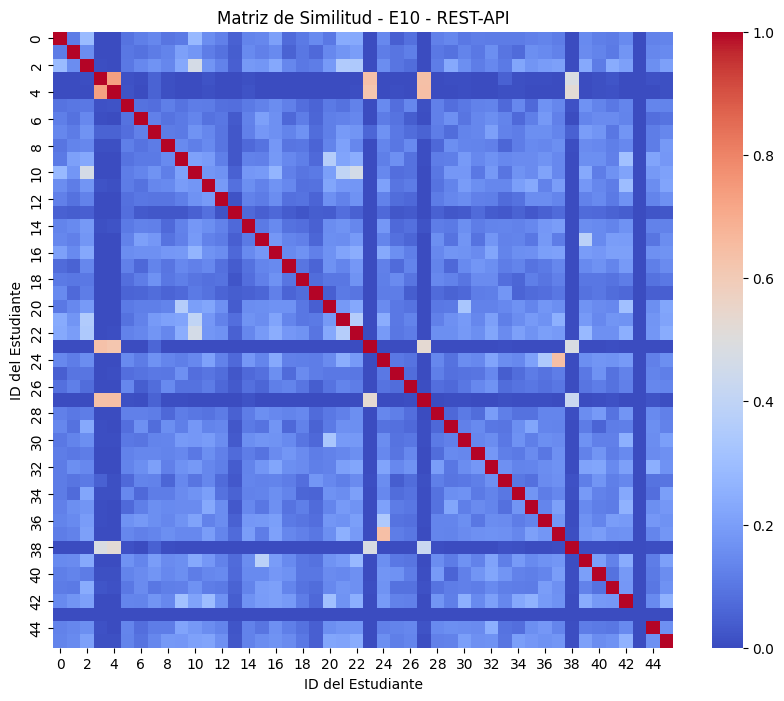

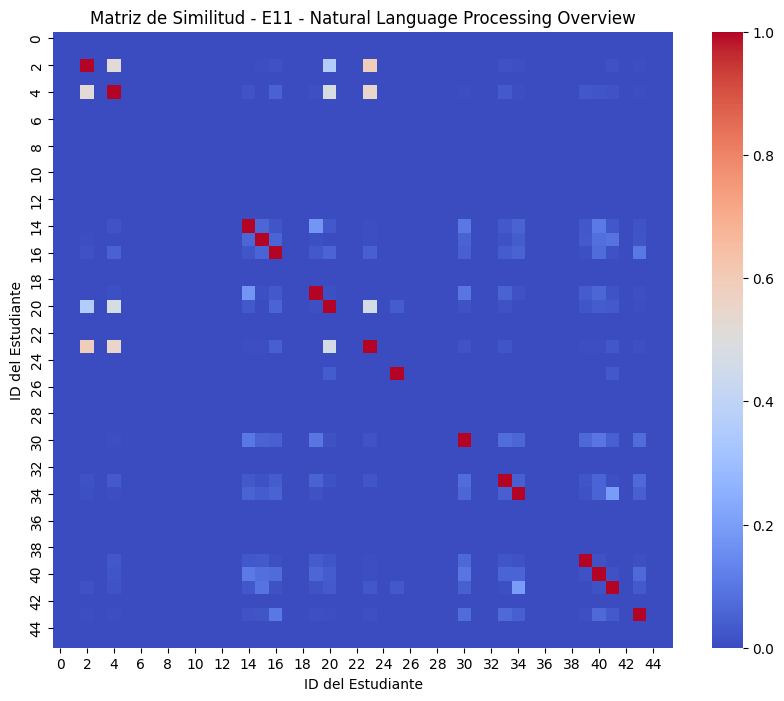

In [19]:
# Analizar similitud para cada tarea
for col in response_columns:
    # Preprocesar el texto
    data1[col + '_tokens'] = data1[col].fillna('').apply(preprocess_text)
    data1[col + '_clean_text'] = data1[col + '_tokens'].apply(lambda tokens: ' '.join(tokens))

    # Vectorizar
    tfidf_matrix_task = tfidf_vectorizer.fit_transform(data1[col + '_clean_text'])

    # Calcular similitud
    cosine_sim_matrix_task = cosine_similarity(tfidf_matrix_task)

    # Crear DataFrame de similitud
    similarity_df_task = pd.DataFrame(cosine_sim_matrix_task, index=data1['ID'], columns=data1['ID'])

    # Visualizar mapa de calor
    plt.figure(figsize=(10,8))
    sns.heatmap(similarity_df_task, cmap='coolwarm')
    plt.title(f'Matriz de Similitud - {col}')
    plt.xlabel('ID del Estudiante')
    plt.ylabel('ID del Estudiante')
    plt.show()


# Exercise 2.3

Create a classifier to predict the gender of each student



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from nltk.corpus import stopwords
import pandas as pd
import nltk

In [20]:
data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",NaN,Los microservicios son servicios web con alcan...,NaN
6,M,NaN,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",NaN
7,M,El análisis de series de tiempo (TSA) tiene un...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,NaN
8,F,Ejemplo 1: número de estudiantes semestrales i...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,NaN,Los microservicios es un tipo de arquitectura ...,NaN
9,M,"Pronósticos de producción, análisis de inflaci...",Una serie de tiempo contiene observaciones de ...,Arboles de decisión \nLos árboles de decisión ...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,NaN


In [21]:
response_columns = [col for col in data.columns if col.startswith('E')]

# Combinar las respuestas
data['Combined_Responses'] = data[response_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [22]:
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
combined_stopwords = set(stopwords_en + stopwords_es)

# Función para procesar un texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Remover caracteres especiales y números, pero dejar espacios
    text = re.sub(r'[^a-záéíóúüñ ]+', '', text)  # Preserva caracteres en español
    # Tokenizar y eliminar stopwords
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in combined_stopwords]
    # Unir tokens filtrados de nuevo a una cadena de texto
    return ' '.join(filtered_tokens)


data['Processed_Responses'] = data['Combined_Responses'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Combinar respuestas y procesar valores NaN
data['Combined_Responses'] = data[[col for col in data.columns if col.startswith('E')]].apply(lambda x: ' '.join(x.fillna('').astype(str)), axis=1)

# Crear la lista combinada de stopwords en inglés y español
combined_stopwords = stopwords.words('english') + stopwords.words('spanish')

In [40]:
# Vectorizar los datos utilizando CountVectorizer
X = CountVectorizer(max_features=400, stop_words=combined_stopwords).fit_transform(data['Combined_Responses'])
y = data['Genero'].fillna('F').map({'M': 1, 'F': 0})

In [37]:
# Definir una función para entrenar y evaluar modelos
def train_and_evaluate(model, param_grid, X, y):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid.fit(X, y)
    y_pred = cross_val_predict(grid.best_estimator_, X, y, cv=5, method='predict')
    y_prob = cross_val_predict(grid.best_estimator_, X, y, cv=5, method='predict_proba')[:, 1]
    print(f'Best Parameters for {model.__class__.__name__}:', grid.best_params_)
    print(f'Best AUC for {model.__class__.__name__}:', grid.best_score_)
    print('Accuracy:', accuracy_score(y, y_pred))
    print('Precision:', precision_score(y, y_pred, average='weighted', zero_division=0))
    print('Recall:', recall_score(y, y_pred, average='weighted'))
    print('F1 Score:', f1_score(y, y_pred, average='weighted'))
    print('AUC:', roc_auc_score(y, y_prob))
    print()

In [43]:
# Diccionario de modelos y parámetros para optimizar las pruebas
model_params = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10, 15, 20],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000, random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,),(150,)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'learning_rate': ['constant', 'adaptive'],
            'alpha': [0.0001, 0.001]
        }
    }
}

# Entrenar y evaluar cada modelo
def run_models(model_params, X, y):
    for model_name, config in model_params.items():
        print(f'Training {model_name}...')
        train_and_evaluate(config['model'], config['params'], X, y)

run_models(model_params, X, y)


Training RandomForest...
Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 50}
Best AUC for RandomForestClassifier: 0.7785714285714285
Accuracy: 0.8043478260869565
Precision: 0.7819346140883047
Recall: 0.8043478260869565
F1 Score: 0.7603403750899623
AUC: 0.7527777777777778

Training MLPClassifier...
Best Parameters for MLPClassifier: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best AUC for MLPClassifier: 0.6553571428571429
Accuracy: 0.7608695652173914
Precision: 0.6086956521739131
Recall: 0.7608695652173914
F1 Score: 0.6763285024154589
AUC: 0.6277777777777778



# Exercise 2.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [44]:
features = data1[['avg_word_length', 'avg_sentence_length', 'lexical_diversity']]

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [46]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)
clusters = kmeans.labels_
data['Cluster'] = clusters


In [47]:
for i in range(num_clusters):
    group = data1[data['Cluster'] == i]
    print(f"\nSubgrupo {i}:")
    print(f"Número de estudiantes: {len(group)}")
    print(f"Características promedio:")
    print(group[['avg_word_length', 'avg_sentence_length', 'lexical_diversity']].mean())



Subgrupo 0:
Número de estudiantes: 11
Características promedio:
avg_word_length         7.583242
avg_sentence_length    47.576807
lexical_diversity       0.602824
dtype: float64

Subgrupo 1:
Número de estudiantes: 28
Características promedio:
avg_word_length         7.537196
avg_sentence_length    29.202218
lexical_diversity       0.627871
dtype: float64

Subgrupo 2:
Número de estudiantes: 7
Características promedio:
avg_word_length         5.541253
avg_sentence_length    28.861814
lexical_diversity       0.407307
dtype: float64


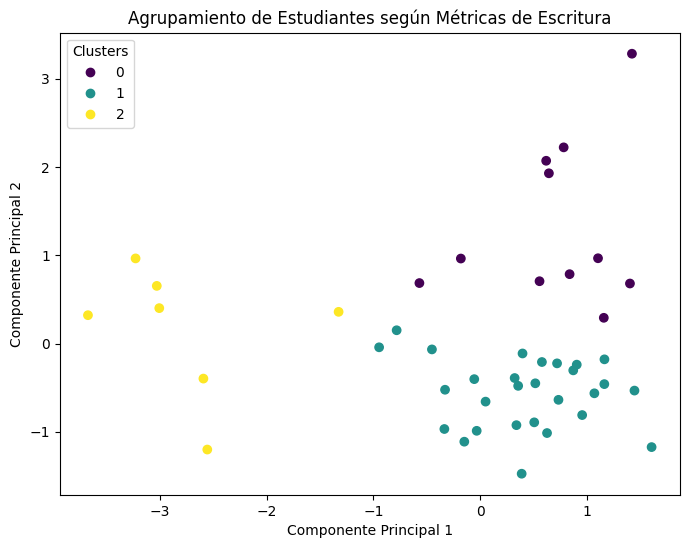

In [48]:
# Reducir a 2 dimensiones para visualizar
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Agrupamiento de Estudiantes según Métricas de Escritura')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()
